<a href="https://colab.research.google.com/github/aolea/showcase-ai-colab-notebooks/blob/main/Detectron2_Pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Keypoints model playground

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is an unofficial colab tutorial of detectron2. 

Here, we run inference on images or videos, with an existing detectron2  keypoints model.

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [1]:
!pip install pyyaml==5.1 yt-dlp

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

     |████████████████████████████████| 274 kB 12.7 MB/s 
     |████████████████████████████████| 2.6 MB 35.5 MB/s 
     |████████████████████████████████| 218 kB 48.9 MB/s 
     |████████████████████████████████| 111 kB 40.4 MB/s 
     |████████████████████████████████| 2.0 MB 7.5 MB/s 
     |████████████████████████████████| 357 kB 48.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=d974720ea0a93c8203c7925ea74585e6a5c8d628463e9647e2ebd95365bb43c8
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 675 kB/s 
     |███████████████████████████

In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run pre-trained detectron2 keypoints model

In [3]:
IMAGE_URL = 'https://i.imgur.com/nTY67on.png'
VIDEO_URL = 'https://www.youtube.com/watch?v=xg5Uwi_YR-o'
START, END = ('00:01:40', '00:01:50')  # Crop these 10 seconds of video
KEYPOINTS_MODEL = 'keypoint_rcnn_R_101_FPN_3x'  # Available models: https://github.com/facebookresearch/detectron2/tree/main/configs/COCO-Keypoints

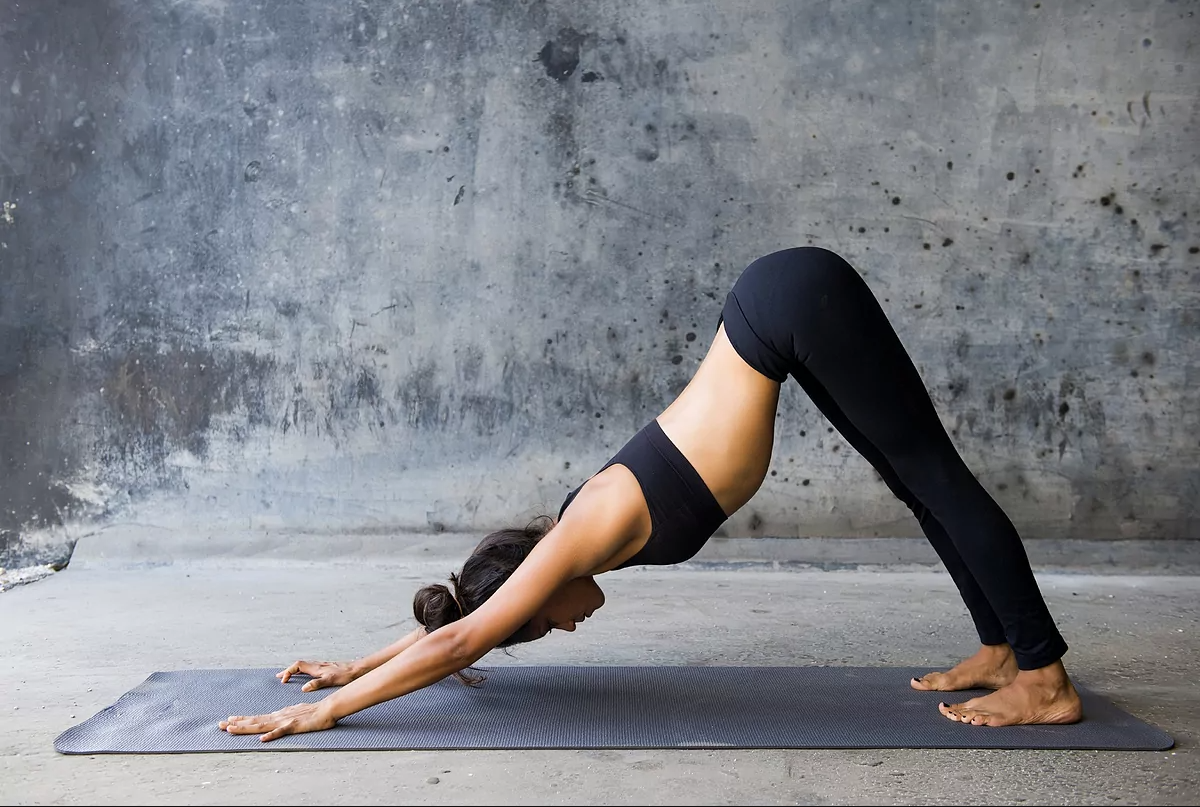

In [4]:
!wget {IMAGE_URL} -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

model_final_997cc7.pkl: 313MB [00:14, 22.3MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floord

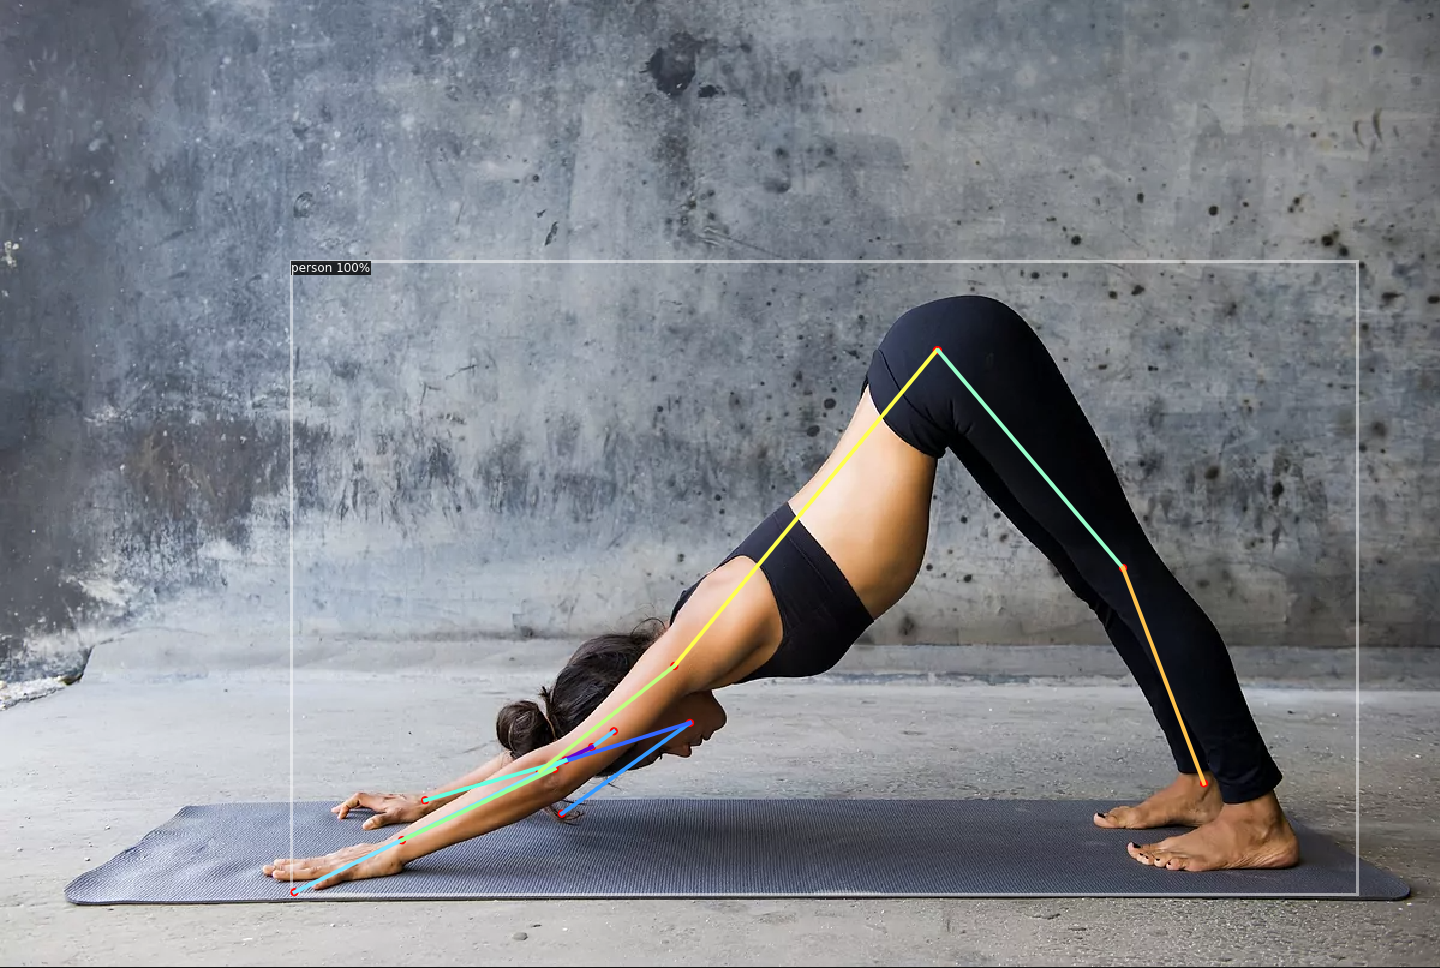

In [5]:
# Inference with a keypoint detection model for a single image
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(f"COCO-Keypoints/{KEYPOINTS_MODEL}.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(f"COCO-Keypoints/{KEYPOINTS_MODEL}.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [6]:
!yt-dlp {VIDEO_URL} -f 22 -o video.mp4  # download video from youtube
!ffmpeg -i video.mp4 -ss {START} -to {END} -c:v copy video-clip.mp4 -y  # crop video

[youtube] xg5Uwi_YR-o: Downloading webpage
[youtube] xg5Uwi_YR-o: Downloading android player API JSON
[info] xg5Uwi_YR-o: Downloading 1 format(s): 22
[download] Destination: video.mp4
[download] 100% of 62.78MiB in 00:03
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --en

In [7]:
def frame_from_video(video):
  """ Yields each frame from a video until ends """
  while video.isOpened():
      success, frame = video.read()
      if success:
          yield frame
      else:
          break

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


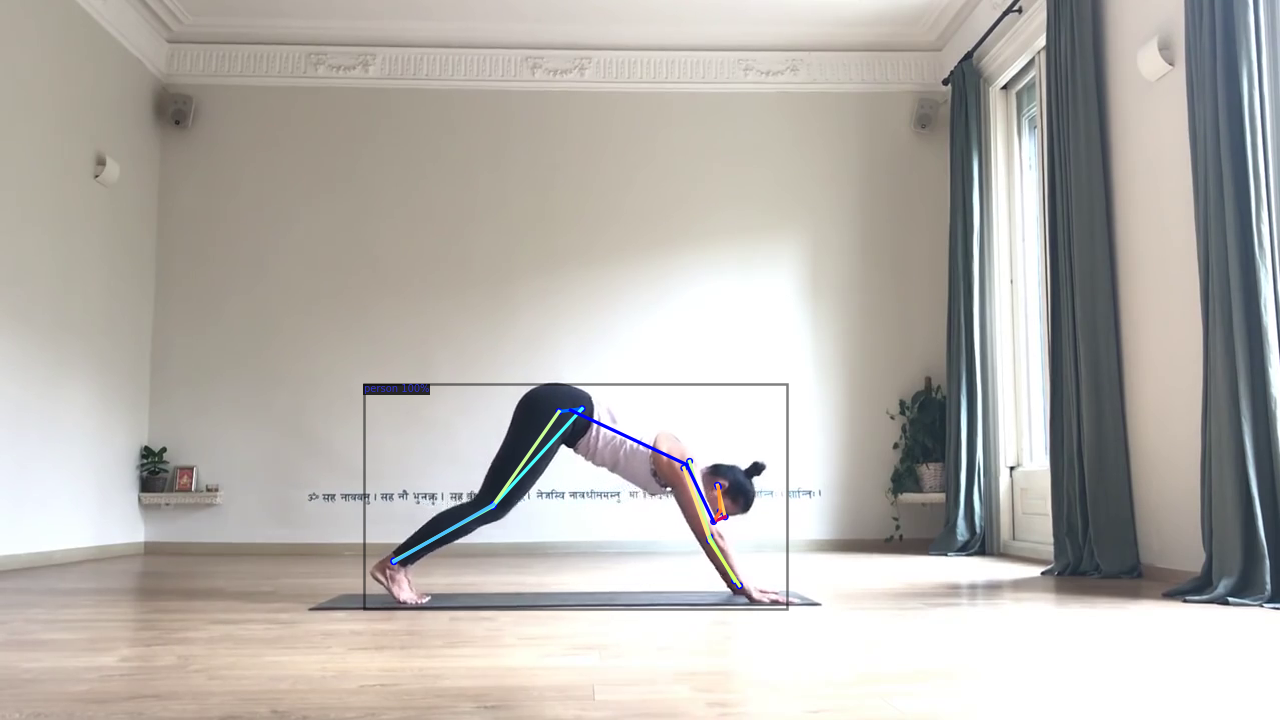

In [8]:
# Inference with a keypoint detection model for a cropped video
video_input = 'video-clip.mp4'
assert os.path.isfile(video_input)
video = cv2.VideoCapture(video_input)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
codec, file_ext =  ("mp4v", ".mp4")
output_fname = 'video-predicted' + file_ext

output_file = cv2.VideoWriter(
    filename=output_fname,
    fourcc=cv2.VideoWriter_fourcc(*codec),
    fps=float(frames_per_second),
    frameSize=(width, height),
    isColor=True,
)

for frame in frame_from_video(video):
    outputs = predictor(frame)
    v = Visualizer(frame, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    frame_out = out.get_image()
    output_file.write(frame_out)
video.release()
output_file.release()

# show last frame for debugging
cv2_imshow(frame_out)

In [9]:
# Download the results
from google.colab import files
files.download(output_fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>